In [1]:
import os
import librosa   #for audio processing
#import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

c:\users\yuri7\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\users\yuri7\appdata\local\programs\python\python37\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


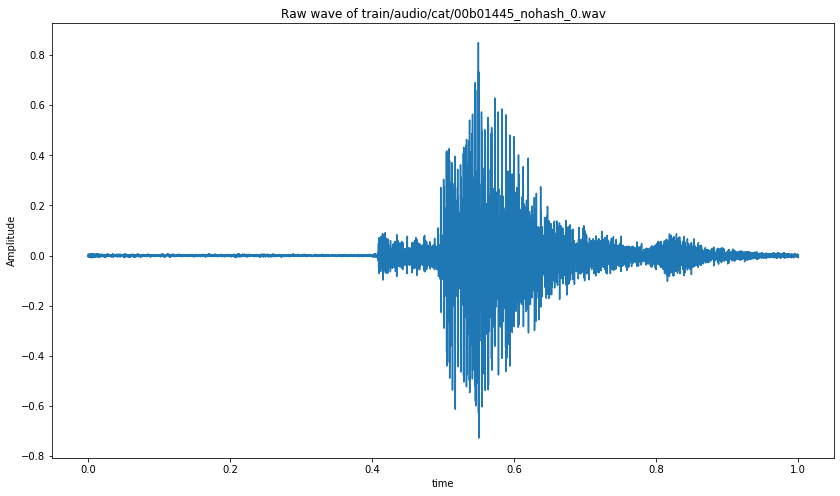

In [2]:
# plotting a sound sample of "bed" (Time domain)
train_audio_path = 'train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'cat/00b01445_nohash_0.wav', sr=16000) # sample rate = sr
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.set_title('Raw wave of ' + 'train/audio/cat/00b01445_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

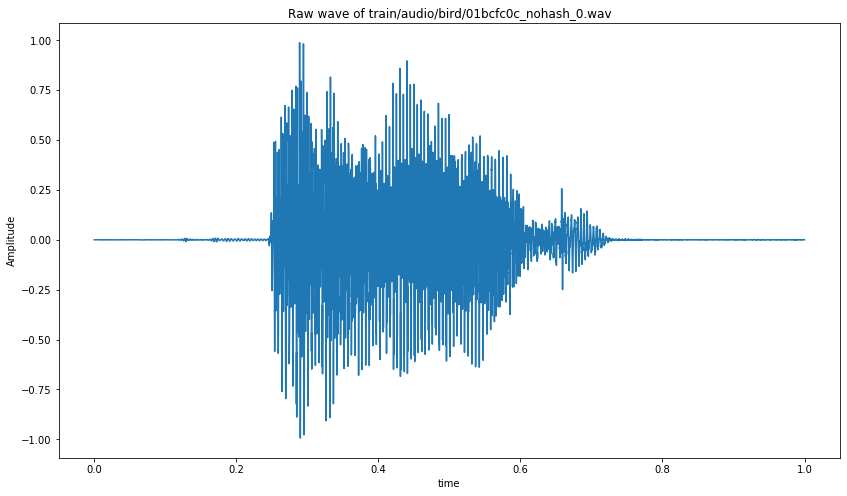

In [3]:
# plotting a sound sample of "bed" (Time domain)
train_audio_path = 'train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'bird/01bcfc0c_nohash_0.wav', sr=16000) # sample rate = sr
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.set_title('Raw wave of ' + 'train/audio/bird/01bcfc0c_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [4]:
samples

array([2.1362305e-04, 3.3569336e-04, 2.1362305e-04, ..., 6.1035156e-05,
       0.0000000e+00, 3.0517578e-04], dtype=float32)

In [5]:
# 時間がかかります
train_audio_path = 'train/audio/'
labels = ["cat","bird"]

all_wave = []
all_label = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')] # list of wavfiles
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000) # open wavfile
        samples = librosa.resample(samples, sample_rate, 8000) # resample
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

In [6]:
print(all_label[:5]) # all_labelには正解ラベルが格納されている
print(all_wave[:5])

['cat', 'cat', 'cat', 'cat', 'cat']
[array([-0.00242816, -0.00173761, -0.00195774, ..., -0.00414765,
       -0.00285007, -0.00390239], dtype=float32), array([ 0.00165148, -0.00329753, -0.00312735, ..., -0.00024592,
       -0.00398087, -0.00460584], dtype=float32), array([ 0.00010595,  0.00050819,  0.00091511, ..., -0.00085146,
       -0.0007866 , -0.00067994], dtype=float32), array([0.00014585, 0.00052237, 0.00066892, ..., 0.00018527, 0.00015939,
       0.00050516], dtype=float32), array([ 0.00016002,  0.00050024,  0.00040712, ...,  0.00058082,
        0.0001182 , -0.00017271], dtype=float32)]


In [7]:
# Convert the output labels to integer encoded:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
y # labelを数値化

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [9]:
print(y[0])
print(y[300])

[0. 1.]
[1. 0.]


In [10]:
# conv1dへの入力は3D配列でなければならないため、2D配列を3Dに再形成します
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [11]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [12]:
print(y_tr[:3])
x_tr[:3]

[[0. 1.]
 [1. 0.]
 [0. 1.]]


array([[[ 6.84994797e-04],
        [ 1.37647358e-03],
        [ 9.89176915e-04],
        ...,
        [ 5.09395788e-04],
        [ 1.78795730e-04],
        [ 1.06590602e-03]],

       [[ 3.01181626e-06],
        [-8.94130699e-06],
        [-2.34660456e-06],
        ...,
        [-2.04885851e-06],
        [ 9.32690455e-06],
        [-5.17857661e-05]],

       [[-1.77693892e-05],
        [-4.15813483e-05],
        [ 1.05765475e-05],
        ...,
        [ 2.85405107e-03],
        [-1.82183474e-04],
        [-5.17535409e-05]]], dtype=float32)

In [13]:
print(y_val[:3])
x_val[:3]

[[1. 0.]
 [1. 0.]
 [1. 0.]]


array([[[ 4.4556800e-05],
        [ 3.7893467e-04],
        [ 5.0628721e-04],
        ...,
        [-2.6353836e-04],
        [-3.1664970e-04],
        [-5.1055418e-04]],

       [[ 4.5221992e-04],
        [ 9.7868592e-04],
        [ 1.0198135e-03],
        ...,
        [ 3.3170389e-04],
        [ 8.1702956e-04],
        [ 7.7371422e-04]],

       [[-2.6232974e-05],
        [ 1.0968488e-05],
        [ 8.5923972e-07],
        ...,
        [-3.0253272e-04],
        [-2.9413341e-04],
        [-1.8483808e-04]]], dtype=float32)

In [14]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs) # 
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # loss function, opnimizer, metricsを定義


Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [16]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [17]:
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 277 samples, validate on 70 samples
Epoch 1/10
277/277 [==============================] - 3s - loss: 0.6999 - acc: 0.5596 - val_loss: 0.6519 - val_acc: 0.6000
Epoch 2/10
277/277 [==============================] - 1s - loss: 0.6257 - acc: 0.6534 - val_loss: 0.6254 - val_acc: 0.7571
Epoch 3/10
277/277 [==============================] - 1s - loss: 0.5547 - acc: 0.7473 - val_loss: 0.5483 - val_acc: 0.7857
Epoch 4/10
277/277 [==============================] - 1s - loss: 0.4413 - acc: 0.8051 - val_loss: 0.4746 - val_acc: 0.7857
Epoch 5/10
277/277 [==============================] - 1s - loss: 0.3325 - acc: 0.8736 - val_loss: 0.3402 - val_acc: 0.8429
Epoch 6/10
277/277 [==============================] - 1s - loss: 0.2590 - acc: 0.8989 - val_loss: 0.2924 - val_acc: 0.8857
Epoch

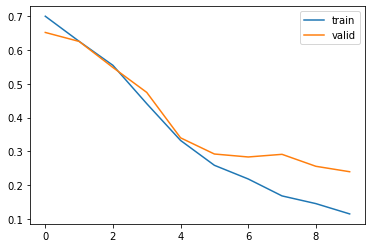

In [18]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='valid') 
pyplot.legend() 
pyplot.show()

In [19]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [20]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
print("Text:",predict(samples))

Audio: cat
Text: cat
